<h6>PE02_A02<h6>
    
# SBBFU Project 

### 1. About the project 
 
    
##### 
    
> We aim to develop Python-based data analysis software
> The goal is to develop software that can analyze wafer scale data in detail.
>
> At first,
>
> The main task is to receive data from the customer and then receive the request.
> 
> Main request 
> + Lot
> + Wafer
> + Die row & colum
> 
> We can analyze the selected data by specifying specific elements    
> In order to develop such analysis software, 
> a black box(software) that implments this function is created to solve the customer's request.
>
> In the software,
> We process the raw data and print it out. 
> We show the processed data as a 2*3 figure and save the file. 
> 
> In addition, it creates an Excel csv file that can analyze varous 
> xml files as a result file and makes a dataframe that can be compared simply.
>
> Finally, the final report The final goal is to make documentation about the tasks 
> we did using a jupyter notebook and report it to the customer.
>
> Please put the data in the 'Data' folder
> specify the file path
> Run the Run.py 



### 2. Project information 


>Create a folder corresponding to the output that can be delivered to customers by copying the data in the **'Data'** folder to **'Result'**
 >Data is processed by selecting only files with the filename "LMZ"
 >Load the module that processes and fits raw data and the module that makes the data parsed from xml file into a csv file, respectively.
>
>* Getting Stared
>   + Entered the Terminal, write down 'pip install -r requirements.txt' and download it. \
>``(base) C:\Download\PE02_A02_SBBFU-1>pip install -r requirements.txt``
>
>
>* How to Run
>   + Please enter the file_location and parameter of save_figure, show_figure, save_csv. \
``file_path = '.\dat\P184640\**\*LMZ?.xml'``\
``save_figure = 'T' or 'F' `` \
``show_figure = 'T' or 'F' `` \
``save_csv = 'T' or 'F'``


### 3. Description of the module file feature 

 #### 1. Fitting module 
 

  >-   The graph is drawn by parsing the raw data of Wavelengthsweep, IL, Current, and Voltage in the xml file.
  >-   The fitting of parsing a raw data and displays the data value y-axis corresponding to x-axis by the customer and the desired R-squared, etc. and stored in the graph to visualize the image.

 #### 2. CSV module 
 

  >- Create a dataframe so that the meausured information in the xml file can be viewed at a glance.
  >- Save this data frome in csv format in the 'Result' folder.

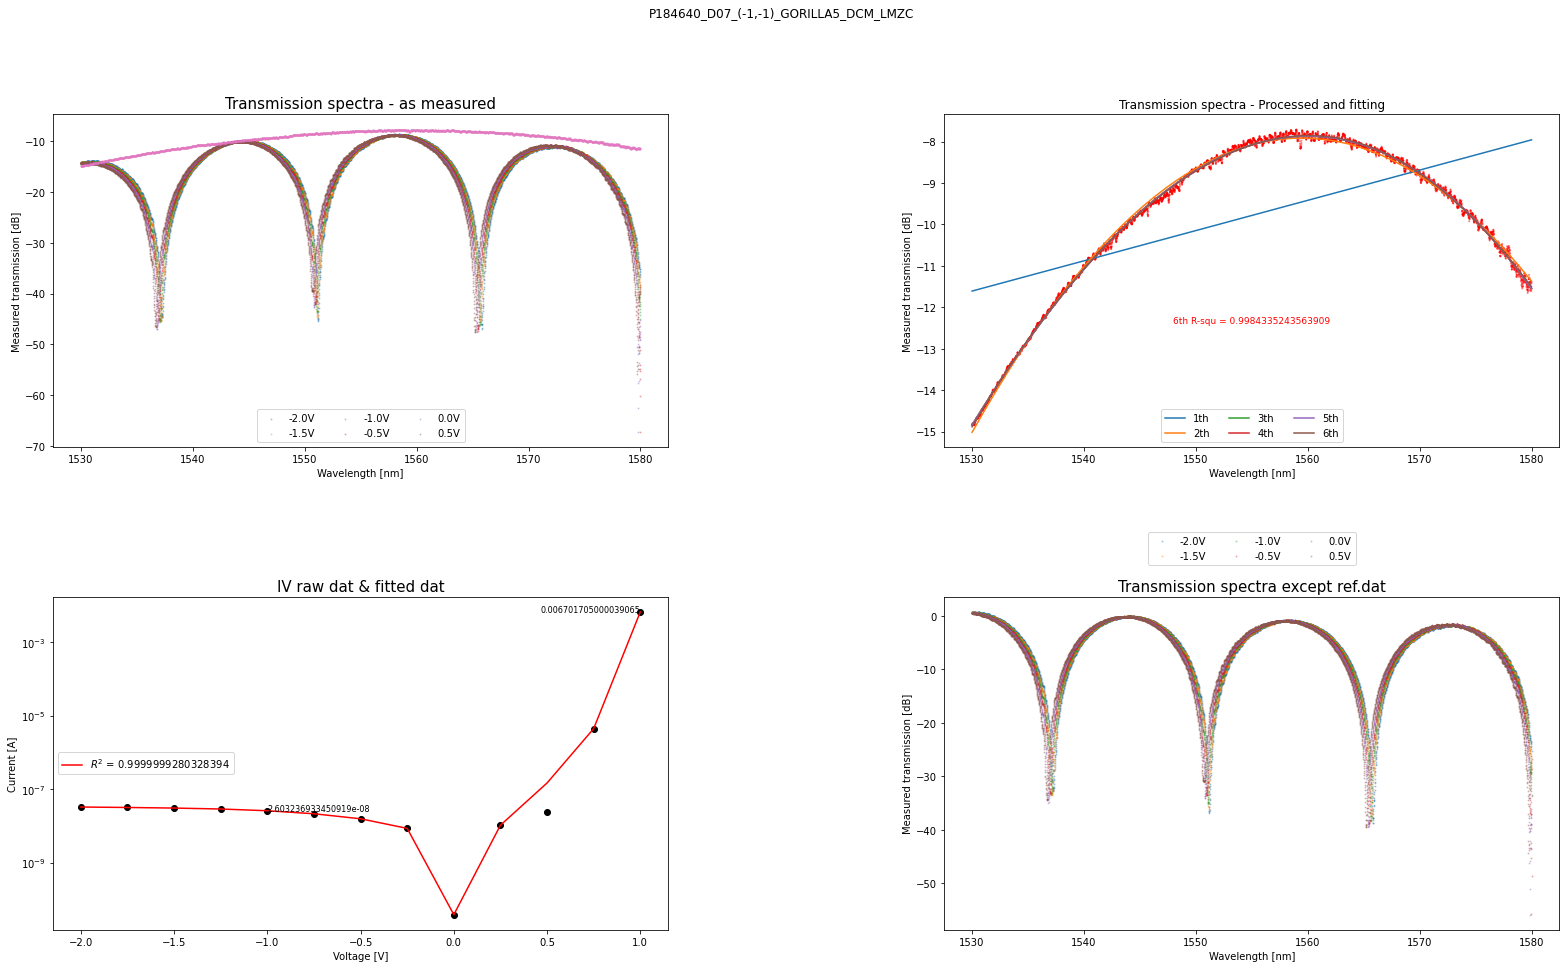

In [19]:
from src import process , IVfitting, Measured_Spectra , Processed_spectra , Ref_fitting ,tocsv

file_path = '.\dat\P184640\D07\**\*LMZ?.xml'
save_figure = 'F'
show_figure = 'T'
save_csv = 'T'

xml=[]
for filename in glob.glob(file_path, recursive= True):
    xml.append(filename)

    # fitting 실행
process.fitting(xml[0],save_figure,show_figure)


## 니네가 준 데이터중 fitting 예시가 이거다.

In [25]:
import pandas as pd


    C = np.array(y[:10])
    V = np.array(x[:10])
    fit1 = np.polyfit(V, C, 11)
    fit1 = np.poly1d(fit1)

    # I = a(exp(bV-1)+alpha
    def IV_fit(x, a, b):
        return (a * (exp(b * x) - 1) + fit1(x))

    model = Model(IV_fit)
    result = model.fit(y, x=x, a=10e-16, b=1 / 0.026)

    initial_list = []
    for i in x:
        x_value = IV_fit(i, 10e-16, 1 / 0.026)
        initial_list.append(x_value)

    initial = sm.add_constant(np.abs(y))
    result1 = sm.OLS(initial_list, initial).fit()
    IVdic = {y: x for x, y in zip(result.best_fit, x)}
    refx = list(map(float, soup.findAll('l')[6].string.split(',')))
    refy = list(map(float, soup.findAll('il')[6].string.split(',')))

    Rsqref = poly(refx, refy, 6)

    Lot = soup.select('testsiteinfo')[0]['batch']
    Wafer = soup.select('testsiteinfo')[0]['wafer']
    Mask = soup.select('testsiteinfo')[0]['maskset']
    Column = soup.select('testsiteinfo')[0]['diecolumn']
    Row = soup.select('testsiteinfo')[0]['dierow']
    TestSite = soup.select('testsiteinfo')[0]['testsite']
    Name = soup.select("modulator")[0]['name']

    Date = soup.select('oiomeasurement')[0]['creationdate']
    Date = parse(Date).strftime("%Y%m%d_%H%M%S")

    error_flag_list = []
    error_description = []
    WL_list = []
    Rsq = result1.rsquared
    if Rsq < 0.95:
        error_flag_list.append(1)
        error_description.append('Rsq error')
    else:
        error_flag_list.append(0)
        error_description.append('No error')

    WL_analy = soup.findAll('designparameter')
    for k in range(0, len(WL_analy)):
        if WL_analy[k]['symbol'] == 'WL':
            WL_list.append(WL_analy[k].text)



df = pd.DataFrame(columns=['Lot', 'Wafer', 'Mask', 'TestSite', 'Name', 'Date', 'Script ID',
                               'Script Version', 'Script Owner', 'Operator', 'Row', 'Column',
                               'ErrorFlag', 'Error description', 'Analysis Wavelength', 'Rsq of Ref.spectrum (Nth)',
                               'Max transmission of Ref. spec. (dB)', 'Rsq of IV', 'I at -1V [A]', 'I at 1V [A]'])

IndentationError: unexpected indent (<ipython-input-25-3d085d219b4c>, line 4)

## 니네가 준 데이터들은 이런 모양이다.

In [48]:
from src.tocsv import csv_mod

for i in xml:
    csv_mod(i)
df

,Lot,Wafer,Mask,TestSite,Name,Date,Script ID,Script Version,Script Owner,Operator,Row,Column,ErrorFlag,Error description,Analysis Wavelength,Rsq of Ref.spectrum (Nth),Max transmission of Ref. spec. (dB),Rsq of IV,I at -1V [A],I at 1V [A]


## 여기서 나타나는 errorflag는 i-v그래프가 잘못생긴모양이다. 참고해라

## 결론적으로 ~~~

In [38]:
import pandas as pd

df1 = pd.DataFrame({'c1' : ['a', 'b', 'c'], 'c2' : [1, 2, 3]}, index=[4, 5, 6])
